# Softmax 回归

逻辑回归作为一种最简单的分类模型，通常应用于处理二分类问题–即输出只有两种类别。其核心思想是通过逻辑函数（也称sigmoid函数），将输入特征的线性组合映射至(0, 1)区间，将预测结果理解为样本属于某个类别的可能性。一种实用的预测策略是：将预测概率超过0.5的样本判为正类，其余判为负类。

然而，当我们在现实问题中遇到多分类问题时，逻辑回归就显得力不从心了。例如，我们在进行图片分类时，图像的标签不仅仅包括猫和狗，更可能包括成百上千的物种。这个时候，我们需要用到更为复杂的模型，如softmax回归。它是逻辑回归的扩展版本，主要应用于处理多分类问题。它能够构造出一个概率模型，对于每个输入，都能输出它对应于每一类的预测概率。

在介绍softmax回归的详细实现之前，我们先详细解读一下逻辑回归的数学原理以及在深度学习框架PyTorch下的实现。希望通过对比逻辑回归和softmax回归的数学原理和实现过程，能帮助读者在学习softmax回归时有更深入的理解。同时，对逻辑回归的理解和实现也将对深度学习中的其他模型有所启发和帮助


### 数学原理

逻辑函数（Sigmoid函数）
逻辑回归的核心是逻辑函数，也称为Sigmoid函数，它的数学表达式如下：

$$
σ(z) = 1 / (1 + e^{-z})
$$

其中，z 是输入特征的线性组合：

$$z = w1*x1 + w2*x2 + ... + wn*xn + b$$

其中，w 是权重，x 是特征值，b 是偏置项。

这里绘制一下 sigmoid函数

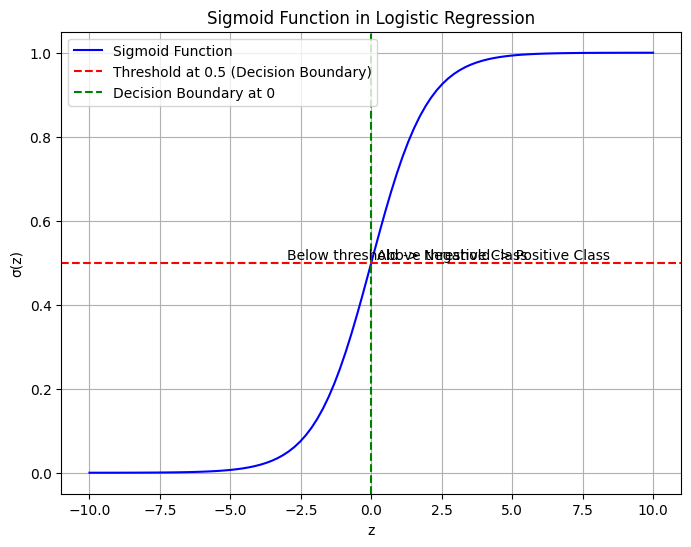

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
y = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, y, label='Sigmoid Function', color='b')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold at 0.5 (Decision Boundary)')
plt.axvline(x=0, color='g', linestyle='--', label='Decision Boundary at 0')
plt.text(0.2, 0.5, 'Above threshold -> Positive Class', fontsize=10, color='black', va='bottom')
plt.text(-3, 0.5, 'Below threshold -> Negative Class', fontsize=10, color='black', va='bottom')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid Function in Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

当我们使用逻辑回归进行二分类任务时，我们需要定义一个损失函数来衡量模型预测值与真实标签之间的差异。在逻辑回归中，常用的损失函数是二分类交叉熵损失（binary cross-entropy loss）。下面我将详细解释二分类交叉熵损失的概念和数学原理，希望能帮助您理解。

### 损失函数的作用
损失函数用于衡量模型预测值与真实标签之间的差异程度。在逻辑回归中，我们通过优化损失函数来调整模型参数，使模型能够更好地预测样本的类别标签。

### 二分类交叉熵损失的数学表达式
二分类交叉熵损失的数学表达式如下：
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$
其中：
- $m$ 是样本数量
- $y^{(i)}$ 是第$i$个样本的真实类别标签（0或1）
- $\hat{y}^{(i)}$ 是模型预测第$i$个样本属于类别1的概率（即sigmoid函数的输出）
- $\log$ 是自然对数

### 解释损失函数
- 当$y^{(i)} = 1$时，损失函数度量模型将正类预测为负类的代价，希望$\hat{y}^{(i)}$接近1，即模型对正类的预测概率高时损失函数趋近0。
- 当$y^{(i)} = 0$时，损失函数度量模型将负类预测为正类的代价，希望$\hat{y}^{(i)}$接近0，即模型对负类的预测概率高时损失函数趋近0。

### 当标签为 0 时的损失：
在逻辑回归中，当样本的真实标签为0时，我们希望模型的预测值接近0，即模型能够正确地将该样本预测为负类。此时我们定义的损失函数为 $-y^{(1)} \log(\hat{y}^{(1)})$。让我详细解释一下这一部分：

1. **样本1的情况：**
   - 根据我们的示例，样本1的真实标签为0，即 $y^{(1)} = 0$。
   - 假设模型预测为 $\hat{y}^{(1)} = 0.2$，表示模型认为样本1是负类的概率为0.2。
   - 我们计算损失为 $-y^{(1)} \log(\hat{y}^{(1)}) = -0 \log(0.2) = 0$。
   - 意味着模型正确地将负类的预测值较低，损失为0。

2. **数学解释：**
   - 当样本的真实标签为0时，损失函数的含义是希末模型将这个样本预测为负类的概率越高越好。
   - 如果模型的预测接近0，即与真实标签一致，损失为0；如果模型的预测接近1，即预测错误，损失会逐渐增大。

### 当标签为 1 时的损失：
在逻辑回归中，当样本的真实标签为1时，我们希望模型的预测值接近1，即模型能够正确地将该样本预测为正类。此时我们定义的损失函数为 $-(1 - y^{(2)}) \log(1 - \hat{y}^{(2)})$。让我详细解释一下这一部分：

1. **样本2的情况：**
   - 根据我们的示例，样本2的真实标签为1，即 $y^{(2)} = 1$。
   - 假设模型预测为 $\hat{y}^{(2)} = 0.8$，表示模型认为样本2是正类的概率为0.8。
   - 我们计算损失为 $-(1 - y^{(2)}) \log(1 - \hat{y}^{(2)}) = -(1 - 1) \log(1 - 0.8) = - \log(0.2)$。
   - 意味着模型将正类的预测值较高，损失较小。

2. **数学解释：**
   - 当样本的真实标签为1时，损失函数的含义是希末模型将这个样本预测为正类的概率越高越好。
   - 如果模型的预测接近1，即与真实标签一致，损失为0；如果模型的预测接近0，即预测错误，损失会逐渐增大。


### 梯度下降优化
通过梯度下降优化算法，我们可以最小化损失函数$J(\theta)$，通过反向传播和参数更新，使模型能够学习适合的参数以更好地预测样本的类别标签。



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# 准备数据集
X = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[0], [1], [1]])

# 定义模型
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegression()

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y.float())
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# 模型预测
with torch.no_grad():
    pred = model(X)
    predicted = (pred > 0.5).float()
    print(f'Predictions: {predicted.squeeze()}')

Epoch [10/100], Loss: 1.1013423204421997
Epoch [20/100], Loss: 0.9767546653747559
Epoch [30/100], Loss: 0.8779447674751282
Epoch [40/100], Loss: 0.8011948466300964
Epoch [50/100], Loss: 0.7423084378242493
Epoch [60/100], Loss: 0.6973257064819336
Epoch [70/100], Loss: 0.6628978252410889
Epoch [80/100], Loss: 0.6363773941993713
Epoch [90/100], Loss: 0.6157539486885071
Epoch [100/100], Loss: 0.5995325446128845
Predictions: tensor([1., 1., 1.])


可以将逻辑回归视为在线性回归模型之后添加一个 sigmoid 激活函数层。具体地说，逻辑回归通过一个线性变换（如全连接层）将输入特征映射到一个连续的实数值，然后通过 sigmoid 函数将这个实数值转换为(0, 1)之间的概率值。

这里也可以使用 Sequential 类实现

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# 准备数据集
X = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[0], [1], [1]])

# 定义模型
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y.float())
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
        if (epoch+1) % 10 == 0:  # 每10轮epoch后显示模型参数的变化
            for name, param in model.named_parameters():
                if param.requires_grad:
                    print(f'Parameter name: {name}, Value: {param.data}')

# 逻辑回归的参数
# 在逻辑回归模型中，参数包括权重和偏置，在这里是线性层(nn.Linear)的权重参数和偏置参数
# 参数名称可通过 model.named_parameters() 或 model.parameters() 获取
# 权重参数对应 Linear 层中的 weight，偏置参数对应 Linear 层中的 bias
# 在训练过程中，这些参数会根据损失函数的梯度逐步更新，以使模型逼近最佳解

Epoch [10/100], Loss: 0.4108055531978607
Parameter name: 0.weight, Value: tensor([[0.9837]])
Parameter name: 0.bias, Value: tensor([-0.5654])
Epoch [20/100], Loss: 0.409644216299057
Parameter name: 0.weight, Value: tensor([[0.9853]])
Parameter name: 0.bias, Value: tensor([-0.5761])
Epoch [30/100], Loss: 0.4085030257701874
Parameter name: 0.weight, Value: tensor([[0.9870]])
Parameter name: 0.bias, Value: tensor([-0.5866])
Epoch [40/100], Loss: 0.4073798954486847
Parameter name: 0.weight, Value: tensor([[0.9890]])
Parameter name: 0.bias, Value: tensor([-0.5970])
Epoch [50/100], Loss: 0.4062732458114624
Parameter name: 0.weight, Value: tensor([[0.9911]])
Parameter name: 0.bias, Value: tensor([-0.6073])
Epoch [60/100], Loss: 0.40518149733543396
Parameter name: 0.weight, Value: tensor([[0.9934]])
Parameter name: 0.bias, Value: tensor([-0.6175])
Epoch [70/100], Loss: 0.40410324931144714
Parameter name: 0.weight, Value: tensor([[0.9958]])
Parameter name: 0.bias, Value: tensor([-0.6276])
Epoch

OK，那这边应该对逻辑回归理解的差不多了，参数还是两个，就是线性层里参数的调整，只是加了个sigmoid层当激活函数

开始理解 SoftMax 回归吧

和线性回归与逻辑回归不同，softmax回归的输出单元从一个变成了多个，且引入了softmax运算使输出更适合离散值的预测和训练。本节以softmax回归模型为例，介绍神经网络中的分类模型

通过对比普遍的线性回归模型用于输出连续值的情况，在分类问题中，模型输出可以是一个像素类别的概率的矩阵。对于这样的分类概率问题，我们可以使用softmax回归的多类别模型。和线性回归不同，softmax回归的输出单元从一个变成了多个，因引入softmax运算使模型输出的是一个概率分布。本节以softmax回归模型为例，介绍神经网络中的分类模型。

### 3.4.1 分类问题
让我们考虑一个简单的图像分类问题，模型\( \text{输入} \)是图像的拉伸成的向量，目的是分类。这样每个像素点都可以用一个实数表示。我们将图像中的像素索引为\( x_1, x_2, x_3, \dots, x_4 \)，假设图像数据由三类像素的实数表示标记，那么对应可以利用线性模型来描述3种分类，这些模型分别对应标签\( y_1, y_2, y_3 \)。

我们通常使用的线性模型来表示类别索引别，例如\( y = 1, y = 2, y = 3 \)。如此，一张图像的每个分类，2种3x3个像素组成的一个。虽然我们仍然可以使用回归模型来进行建模，将类别标记就是连续变量化到1，2种3x3个像素组成一，但这种连续回归模型的缺陷会导致分类效果差。因此我们一般使用更加适合分类概率的模型来解决分类问题。

### 3.4.2 softmax回归模型
softmax回归模型将构建一个将输入模式与特定类别概率相连。与线性回归的一个主要不同在于，softmax回归的输出值是一个概率分布的类别数。

由于是2x2的象素，所以共享4个特征。因为一个共享4种特征和3种输出概率形成，所以权重包含一个12个概率（带下标的$ w $）。偏置包含3个概率（带下标的$ b $），因对每个输入计算$ o_1, o_2, o_3 $3个输出：
$$
\( o_1 = x_1w_{11} + x_2w_{21} + x_3w_{31} + x_4w_{41} + b_1, \)
$$
$$
\( o_2 = x_1w_{12} + x_2w_{22} + x_3w_{32} + x_4w_{42} + b_2, \)
$$
$$
\( o_3 = x_1w_{13} + x_2w_{23} + x_3w_{33} + x_4w_{43} + b_3, \)
$$



.
<img src="./img/2-8.png">


softmax运算符解决了这个问题，它将下式变换成值为正且和为1的概率分布，总的来说就是通过取指数去放大这个概率


首先，想象你在学校的午餐时间，你有三个选择去吃午饭：汉堡、寿司和沙拉。但是，你需要决定每种食物的可能性—即你会选择它们的概率。在现实生活中，你可能会根据你对这些食物的喜爱程度来决定。在计算机处理这个问题时，我们需要一种方法来把"喜爱程度"转化成概率，而这正是softmax运算符要做的。

想象你非常喜欢汉堡，稍微喜欢寿司，不太喜欢沙拉，我们用数字来表示这种喜爱的程度：汉堡是5，寿司是2，沙拉是1。直接比较这些数字，我们知道你最喜欢汉堡，但是怎么将这个偏好转换成决定概率（即，汉堡的概率最高，其次是寿司，沙拉最低）呢？

这就是softmax运算符的作用。softmax会接受几个数字（比如喜爱程度），并将它们转换成概率，让所有的概率加起来等于1。softmax做的是：首先，它会取这些喜爱程度的"指数"（就是用e（一个数学常数，约等于2.718）的幂），因为指数能够放大差异。如果一个数比另一个数大一点点，取了指数后，这个差异会被放大。

所以我们先计算指数：

- 汉堡：e的5次方大约是148.4
- 寿司：e的2次方大约是7.4
- 沙拉：e的1次方就是2.7

现在我们看到汉堡的得分比其他两个都要高得多。但是我们希望得到的是概率，所以我们需要做的是，将每个食物的指数得分除以所有指数得分的总和。

指数得分的总和 = 148.4 + 7.4 + 2.7 = 158.5

现在计算每种食物的概率：

- 汉堡的概率 = 148.4 / 158.5 = 0.936 （93.6%的可能性选择汉堡）
- 寿司的概率 = 7.4 / 158.5 = 0.047 （4.7%的可能性选择寿司）
- 沙拉的概率 = 2.7 / 158.5 = 0.017 （1.7%的可能性选择沙拉）

现在我们有了一个概率分布：汉堡的概率是93.6%，寿司的概率是4.7%，沙拉的概率是1.7%，而且所有的概率加起来是100%。

这就是softmax运算的核心：它帮助我们将任何一组数字转换成概率，而这些概率的总和是1，这样计算机就能用来做决定了，就像它决定你可能会选择哪种午餐一样。在机器学习中，这有助于模型做出分类决策，比如识别图片里的是狗、猫还是鸡。

那么针对这里的 2x2 图像分类问题，模型输入是四个象素点实数$x_1, x_2, x_3, x_4$，那么对应可以利用线性模型来描述3种分类，这些模型分别对应标签 $ y_1, y_2, y_3 $

$$
\hat{y}_1 = \frac{\exp(o_1)}{\sum_{i=1}^{3} \exp(o_i)}, \quad
\hat{y}_2 = \frac{\exp(o_2)}{\sum_{i=1}^{3} \exp(o_i)}, \quad
\hat{y}_3 = \frac{\exp(o_3)}{\sum_{i=1}^{3} \exp(o_i)}
$$

可以看出 $\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$ 且 $ 0 ≤ \hat{y}_1, \hat{y}_2, \hat{y}_3 ≤ 1 $，因此$\hat{y}_1, \hat{y}_2, \hat{y}_3$ 是一个合法的概率分布。这时候如果 $\hat{y}_2 = 0.8 $, 那么不管如何我们都知道图像类别为猫的概率是80%。



有点蒙，举个例子看看

In [3]:
import torch
from torch import nn
from torch import optim

那么现在开始。与逻辑回归类似，softmax回归是用于多分类问题的一种方法，其中标签类别大于2。softmax回归模型的输出是一个概率分布，显示输入属于每个类别的概率。

在PyTorch中，我们可以使用torch.nn.Sequential来顺序地堆叠层。对于一个简单的softmax回归模型，我们的网络结构将非常直接：一个线性层加上一个softmax激活。但是在实践中，通常不直接对输出层应用softmax函数，而是使用加权的输入直接进行计算，因为在计算损失时会有数值稳定性的考虑。因此，这里我们的网络只包含一个没有激活函数的线性层，然后在计算损失时使用CrossEntropyLoss，其内部会应用softmax。


In [4]:
# 假设每个输入向量的维度是4，我们有3个类别
input_dim = 4
num_classes = 3

# 定义模型
model = nn.Sequential(nn.Linear(input_dim, num_classes))

多列别分类中常使用交叉熵损失，在 PyTorch 中这损失函数内部会进行 softmax 运算，所以模型的输出不需要应用 softmax

In [5]:
loss_function = nn.CrossEntropyLoss()

优化器使用SGD（Stochastic Gradient Descent, SGD），随机梯度下降来更新模型权重

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

下面需要生成一批训练数据，并使用模型进行前向传播预测，计算损失，使用损失反向传播计算梯度，并使用优化器更新模型权重

In [7]:
# 假设我们的数据集
x_train = torch.tensor([[1., 2., 3., 4.], [4., 3., 2., 1.], [2., 2., 2., 2.]])
y_train = torch.tensor([0, 1, 2])

for epoch in range(100):  # 进行100次迭代
    # 步骤2：前向传播
    y_pred = model(x_train)
    
    # 步骤3：计算损失
    loss = loss_function(y_pred, y_train)
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
    # 步骤4：反向传播
    optimizer.zero_grad()
    loss.backward()
    
    # 步骤5：更新权重
    optimizer.step()

Epoch 1, Loss: 1.7291017770767212
Epoch 2, Loss: 1.6530863046646118
Epoch 3, Loss: 1.5827322006225586
Epoch 4, Loss: 1.5176706314086914
Epoch 5, Loss: 1.4575061798095703
Epoch 6, Loss: 1.4018434286117554
Epoch 7, Loss: 1.350305199623108
Epoch 8, Loss: 1.3025445938110352
Epoch 9, Loss: 1.2582505941390991
Epoch 10, Loss: 1.217149257659912
Epoch 11, Loss: 1.179002285003662
Epoch 12, Loss: 1.1436015367507935
Epoch 13, Loss: 1.110764980316162
Epoch 14, Loss: 1.080330491065979
Epoch 15, Loss: 1.0521506071090698
Epoch 16, Loss: 1.026088833808899
Epoch 17, Loss: 1.0020167827606201
Epoch 18, Loss: 0.9798094630241394
Epoch 19, Loss: 0.9593461155891418
Epoch 20, Loss: 0.9405080676078796
Epoch 21, Loss: 0.9231786727905273
Epoch 22, Loss: 0.9072441458702087
Epoch 23, Loss: 0.8925933837890625
Epoch 24, Loss: 0.8791193962097168
Epoch 25, Loss: 0.8667192459106445
Epoch 26, Loss: 0.8552953600883484
Epoch 27, Loss: 0.8447559475898743
Epoch 28, Loss: 0.8350146412849426
Epoch 29, Loss: 0.8259921669960022


在这个过程中，loss.backward()步骤计算损失相对于每个参数的梯度，并存储在参数的.grad属性中。然后，optimizer.step()步骤实际上根据这些梯度更新模型的参数。

# Fashion-MNIST
在介绍softmax回归的实现前我们先引入一个多类图像分类数据集。它将在后面的章节中被多次使用，以方便我们观察比较算法之间在模型精度和计算效率上的区别。图像分类数据集中最常用的是手写数字识别数据集MNIST[1]。但大部分模型在MNIST上的分类精度都超过了95%。为了更直观地观察算法之间的差异，我们将使用一个图像内容更加复杂的数据集Fashion-MNIST[2]（这个数据集也比较小，只有几十M，没有GPU的电脑也能吃得消）。

本节我们将使用torchvision包，它是服务于PyTorch深度学习框架的，主要用来构建计算机视觉模型。torchvision主要由以下几部分构成：
1. torchvision.datasets: 一些加载数据的函数及常用的数据集接口；
2. torchvision.models: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
3. torchvision.transforms: 常用的图片变换，例如裁剪、旋转等；
4. torchvision.utils: 其他的一些有用的方法。

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
import d2lzh_pytorch as d2l


下面，我们通过torchvision的torchvision.datasets来下载这个数据集。第一次调用时会自动从网上获取数据。我们通过参数train来指定获取训练数据集或测试数据集（testing data set）。测试数据集也叫测试集（testing set），只用来评价模型的表现，并不用来训练模型。

另外我们还指定了参数transform = transforms.ToTensor()使所有数据转换为Tensor，如果不进行转换则返回的是PIL图片。transforms.ToTensor()将尺寸为 (H x W x C) 且数据位于[0, 255]的PIL图片或者数据类型为np.uint8的NumPy数组转换为尺寸为(C x H x W)且数据类型为torch.float32且位于[0.0, 1.0]的Tensor。

注意： 由于像素值为0到255的整数，所以刚好是uint8所能表示的范围，包括transforms.ToTensor()在内的一些关于图片的函数就默认输入的是uint8型，若不是，可能不会报错但可能得不到想要的结果。所以，如果用像素值(0-255整数)表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。

In [9]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:11<00:00, 2371066.32it/s]


Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 181827.76it/s]


Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3200525.97it/s]


Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST\FashionMNIST\raw


上面的mnist_train和mnist_test都是torch.utils.data.Dataset的子类，所以我们可以用len()来获取该数据集的大小，还可以用下标来获取具体的一个样本。训练集中和测试集中的每个类别的图像数分别为6,000和1,000。因为有10个类别，所以训练集和测试集的样本数分别为60,000和10,000。

In [10]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))


<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


我们可以通过下标来访问任意一个样本:

In [11]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width


torch.Size([1, 28, 28]) 9


变量feature对应高和宽均为28像素的图像。由于我们使用了transforms.ToTensor()，所以每个像素的数值为[0.0, 1.0]的32位浮点数。需要注意的是，feature的尺寸是 (C x H x W) 的，而不是 (H x W x C)。第一维是通道数，因为数据集中是灰度图像，所以通道数为1。后面两维分别是图像的高和宽。

Fashion-MNIST中一共包括了10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。以下函数可以将数值标签转成相应的文本标签。

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


下面定义一个可以在一行里画出多张图像和对应标签的函数。

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()


现在，我们看一下训练数据集中前10个样本的图像内容和文本标签。

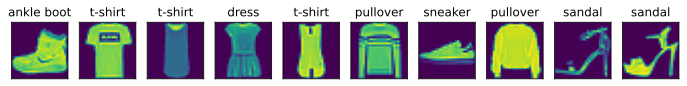

In [13]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))


我们将在训练数据集上训练模型，并将训练好的模型在测试数据集上评价模型的表现。前面说过，mnist_train是torch.utils.data.Dataset的子类，所以我们可以将其传入torch.utils.data.DataLoader来创建一个读取小批量数据样本的DataLoader实例。

在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。PyTorch的DataLoader中一个很方便的功能是允许使用多进程来加速数据读取。这里我们通过参数num_workers来设置4个进程读取数据。

In [14]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)


我们将获取并读取Fashion-MNIST数据集的逻辑封装在d2lzh_pytorch.load_data_fashion_mnist函数中供后面章节调用。该函数将返回train_iter和test_iter两个变量。随着本书内容的不断深入，我们会进一步改进该函数。它的完整实现将在5.6节中描述。

最后我们查看读取一遍训练数据需要的时间。

In [15]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))


1.99 sec


## 实现 Softmax 回归
这一节我们来动手实现softmax回归。首先导入本节实现所需的包或模块。

In [16]:
import torch
import torchvision
import numpy as np
import sys
import d2lzh_pytorch as d2l


### 获取和读取数据
我们将使用Fashion-MNIST数据集，并设置批量大小为256。

我们将使用Fashion-MNIST数据集，并设置批量大小为256。

In [17]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


100%|██████████| 26421880/26421880 [00:12<00:00, 2079218.64it/s]


Extracting C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 186960.38it/s]


Extracting C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2907524.13it/s]


Extracting C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 4867510.59it/s]

Extracting C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\KelvinLM/Datasets/FashionMNIST\FashionMNIST\raw


### 初始化模型参数

跟线性回归中的例子一样，我们将使用向量表示每个样本。已知每个样本输入是高和宽均为28像素的图像。模型的输入向量的长度是 28×28=784：该向量的每个元素对应图像中每个像素。由于图像有10个类别，单层神经网络输出层的输出个数为10，因此softmax回归的权重和偏差参数分别为784×10和1×10的矩阵。

In [18]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)


同之前一样，我们需要模型参数梯度。

In [19]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

### 实现 softmax 运算

在介绍如何定义softmax回归之前，我们先描述一下对如何对多维Tensor按维度操作。在下面的例子中，给定一个Tensor矩阵X。我们可以只对其中同一列（dim=0）或同一行（dim=1）的元素求和，并在结果中保留行和列这两个维度（keepdim=True）。

In [20]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))


tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


下面我们就可以定义前面小节里介绍的softmax运算了。在下面的函数中，矩阵X的行数是样本数，列数是输出个数。为了表达样本预测各个输出的概率，softmax运算会先通过exp函数对每个元素做指数运算，再对exp矩阵同行元素求和，最后令矩阵每行各元素与该行元素之和相除。这样一来，最终得到的矩阵每行元素和为1且非负。因此，该矩阵每行都是合法的概率分布。softmax运算的输出矩阵中的任意一行元素代表了一个样本在各个输出类别上的预测概率。

In [21]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制


可以看到，对于随机输入，我们将每个元素变成了非负数，且每一行和为1。

In [22]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

X = torch.rand((2, 5))
X_prob = softmax(X)
print(X_prob, X_prob.sum(dim=1))


tensor([[0.2259, 0.1341, 0.2145, 0.2591, 0.1665],
        [0.1429, 0.2626, 0.2476, 0.2049, 0.1420]]) tensor([1., 1.])


### 定义模型

有了softmax运算，我们可以定义上节描述的softmax回归模型了。这里通过view函数将每张原始图像改成长度为num_inputs的向量。

In [ ]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)


### 定义损失函数

上一节中，我们介绍了softmax回归使用的交叉熵损失函数。为了得到标签的预测概率，我们可以使用gather函数。在下面的例子中，变量y_hat是2个样本在3个类别的预测概率，变量y是这2个样本的标签类别。通过使用gather函数，我们得到了2个样本的标签的预测概率。与3.4节（softmax回归）数学表述中标签类别离散值从1开始逐一递增不同，在代码中，标签类别的离散值是从0开始逐一递增的。


In [23]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1, 1))


tensor([[0.1000],
        [0.5000]])

下面实现了 softmax回归 中介绍的交叉熵损失函数

In [24]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))


给定一个类别的预测概率分布y_hat，我们把预测概率最大的类别作为输出类别。如果它与真实类别y一致，说明这次预测是正确的。分类准确率即正确预测数量与总预测数量之比。

为了演示准确率的计算，下面定义准确率accuracy函数。其中y_hat.argmax(dim=1)返回矩阵y_hat每行中最大元素的索引，且返回结果与变量y形状相同。相等条件判断式(y_hat.argmax(dim=1) == y)是一个类型为ByteTensor的Tensor，我们用float()将其转换为值为0（相等为假）或1（相等为真）的浮点型Tensor。

In [25]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()


让我们继续使用在演示gather函数时定义的变量y_hat和y，并将它们分别作为预测概率分布和标签。可以看到，第一个样本预测类别为2（该行最大元素0.6在本行的索引为2），与真实标签0不一致；第二个样本预测类别为2（该行最大元素0.5在本行的索引为2），与真实标签2一致。因此，这两个样本上的分类准确率为0.5。

In [26]:
print(accuracy(y_hat, y))


0.5


类似地，我们可以评价模型net在数据集data_iter上的准确率。

In [28]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用。该函数将被逐步改进：它的完整实现将在“图像增广”一节中描述
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n


因为我们随机初始化了模型net，所以这个随机模型的准确率应该接近于类别个数10的倒数即0.1。

In [30]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

print(evaluate_accuracy(test_iter, net))


0.0849


### 训练模型

训练softmax回归的实现跟3.2（线性回归的从零开始实现）一节介绍的线性回归中的实现非常相似。我们同样使用小批量随机梯度下降来优化模型的损失函数。在训练模型时，迭代周期数num_epochs和学习率lr都是可以调的超参数。改变它们的值可能会得到分类更准确的模型。

In [31]:
num_epochs, lr = 5, 0.1

# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                optimizer.step()  # “softmax回归的简洁实现”一节将用到


            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)


epoch 1, loss 0.7834, train acc 0.752, test acc 0.792
epoch 2, loss 0.5699, train acc 0.813, test acc 0.813
epoch 3, loss 0.5257, train acc 0.825, test acc 0.821
epoch 4, loss 0.5011, train acc 0.833, test acc 0.819
epoch 5, loss 0.4858, train acc 0.837, test acc 0.828


### 预测

训练完成后，现在就可以演示如何对图像进行分类了。给定一系列图像（第三行图像输出），我们比较一下它们的真实标签（第一行文本输出）和模型预测结果（第二行文本输出）。

https://blog.csdn.net/xovee/article/details/127850735

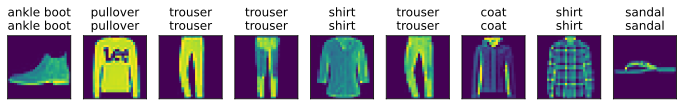

In [33]:
X, y = next(iter(test_iter))

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])


### 小结

可以使用softmax回归做多类别分类。与训练线性回归相比，你会发现训练softmax回归的步骤和它非常相似：获取并读取数据、定义模型和损失函数并使用优化算法训练模型。事实上，绝大多数深度学习模型的训练都有着类似的步骤。

# Softmax 使用 Pytorch 的简洁实现

我们在3.3节（线性回归的简洁实现）中已经了解了使用Pytorch实现模型的便利。下面，让我们再次使用Pytorch来实现一个softmax回归模型。首先导入所需的包或模块。

In [34]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
import d2lzh_pytorch as d2l


我们仍然使用Fashion-MNIST数据集和上一节中设置的批量大小。

In [35]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


在3.4节（softmax回归）中提到，softmax回归的输出层是一个全连接层，所以我们用一个线性模块就可以了。因为前面我们数据返回的每个batch样本x的形状为(batch_size, 1, 28, 28), 所以我们要先用view()将x的形状转换成(batch_size, 784)才送入全连接层。

In [36]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self, x): # x shape: (batch, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1))
        return y

net = LinearNet(num_inputs, num_outputs)


我们将对x的形状转换的这个功能自定义一个FlattenLayer并记录在d2lzh_pytorch中方便后面使用。

In [37]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)


这样我们就可以更方便地定义我们的模型：

In [38]:
from collections import OrderedDict

net = nn.Sequential(
    # FlattenLayer(),
    # nn.Linear(num_inputs, num_outputs)
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)


然后，我们使用均值为0、标准差为0.01的正态分布随机初始化模型的权重参数。

In [39]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0) 


Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

###  softmax和交叉熵损失函数

如果做了上一节的练习，那么你可能意识到了分开定义softmax运算和交叉熵损失函数可能会造成数值不稳定。因此，PyTorch提供了一个包括softmax运算和交叉熵损失计算的函数。它的数值稳定性更好。

In [40]:
loss = nn.CrossEntropyLoss()


### SGD优化

我们使用学习率为0.1的小批量随机梯度下降作为优化算法。

In [41]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)


接下来，我们使用上一节中定义的训练函数来训练模型。

In [43]:
num_epochs = 5

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                optimizer.step()  # “softmax回归的简洁实现”一节将用到


            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss nan, train acc 0.801, test acc 0.787
epoch 2, loss nan, train acc 0.801, test acc 0.787
epoch 3, loss nan, train acc 0.801, test acc 0.787
epoch 4, loss nan, train acc 0.801, test acc 0.787
epoch 5, loss nan, train acc 0.801, test acc 0.787


## 小结

目前来看需要掌握的几个重要例子
1. 手写实现一维、二维的线性回归
2. 手写实现逻辑回归和softmax回归
3. 针对 Fashion-MNIST 实现softmax回归